In [148]:
import math
# import numpy as np

In [149]:
# steps = np.linspace(0,1,13)
# list(steps)
# x = [i for i in steps]
# x.sort()
# print(x)

In [150]:
def step(x):
    return 1 - math.sqrt(1 - x * x)

In [163]:
def build_gradient(steps):

    light = []
    dark = []

    for i in steps:
        x = 100 - round(step(i) * 100, 0)
        light.append(x)

    r = set(light)

    for i in steps:
        x = round(step(i) * 100, 0)
        dark.append(x)

    d = set(dark)


    y_list = list(r)
    y_list.sort(reverse=True)


    d_list = list(d)
    d_list.sort(reverse=True)


    return y_list, d_list

In [164]:
def build_steps(n=12):
    step_size = 1 / n
    nums = []
    x = 0
    for i in range(0, n):
        if x == 0:
            nums.append(0)

        nums.append(x + step_size)
        x = x + step_size

    # print(nums)
    # print(len(nums))

    return nums

In [165]:
rez = build_gradient(build_steps(12))
print(rez[0], len(rez[0]))
print(rez[1], len(rez[1]))

[100.0, 99.0, 97.0, 94.0, 91.0, 87.0, 81.0, 75.0, 66.0, 55.0, 40.0, 0.0] 12
[100.0, 60.0, 45.0, 34.0, 25.0, 19.0, 13.0, 9.0, 6.0, 3.0, 1.0, 0.0] 12


In [166]:
# rez = build_gradient(steps)
# print(rez[0], len(rez[0]))
# print(rez[1], len(rez[1]))

In [156]:
# for c in y_list:
#     print(f"--color-{c}: hsla(200, 90%, {c}%, 1);")
# for c in d_list:
#     print(f"--color-{c}-dark: hsla(200, 90%, {c}%, 1);")

# for c in y_list:
#     print(f""".c{c} """ + "{" + f"background-color: var(--color-{c})" + "}")
# for c in d_list:
#     print(f""".d{c} """ + "{" + f"background-color: var(--color-{c}-dark)" + "}")

# for c in y_list:
#     print(f'<div class="c{c}"></div>')
# for c in d_list:
#     print(f'<div class="d{c}"></div>')

--color-100: hsla(200, 90%, 100%, 1);
--color-99: hsla(200, 90%, 99%, 1);
--color-97: hsla(200, 90%, 97%, 1);
--color-94: hsla(200, 90%, 94%, 1);
--color-91: hsla(200, 90%, 91%, 1);
--color-87: hsla(200, 90%, 87%, 1);
--color-81: hsla(200, 90%, 81%, 1);
--color-75: hsla(200, 90%, 75%, 1);
--color-66: hsla(200, 90%, 66%, 1);
--color-55: hsla(200, 90%, 55%, 1);
--color-40: hsla(200, 90%, 40%, 1);
--color-0: hsla(200, 90%, 0%, 1);
--color-100-dark: hsla(200, 90%, 100%, 1);
--color-60-dark: hsla(200, 90%, 60%, 1);
--color-45-dark: hsla(200, 90%, 45%, 1);
--color-34-dark: hsla(200, 90%, 34%, 1);
--color-25-dark: hsla(200, 90%, 25%, 1);
--color-19-dark: hsla(200, 90%, 19%, 1);
--color-13-dark: hsla(200, 90%, 13%, 1);
--color-9-dark: hsla(200, 90%, 9%, 1);
--color-6-dark: hsla(200, 90%, 6%, 1);
--color-3-dark: hsla(200, 90%, 3%, 1);
--color-1-dark: hsla(200, 90%, 1%, 1);
--color-0-dark: hsla(200, 90%, 0%, 1);
.c100 {background-color: var(--color-100)}
.c99 {background-color: var(--color-99)}


In [110]:
# !pip3 install pandas
# !pip3 install matplotlib

In [115]:
from rb_colorize.tools.color import Color
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

THRESHOLD = 140


In [43]:
def gen_colors(s, l):

    # create colors
    colors = []
        # print(f'{i},{c.name},{lume},{diff}')
    for i in range(0, 360):
        c = Color(i, s, l)
        lume = int(c.luminocity)
        diff = lume - THRESHOLD
        color_data = []
        color_data.append(i)
        color_data.append(c.name)
        color_data.append(lume)
        color_data.append(diff)
        colors.append(color_data)

    # colors

    colors_headers = [
        'hue',
        'name',
        'lume',
        'diff'
    ]

    # create dataframe
    df = pd.DataFrame(colors, columns=colors_headers)

    # use two columns for data visualization
    return df[['hue', 'lume']]

<AxesSubplot:xlabel='hue'>

<Figure size 1440x720 with 0 Axes>

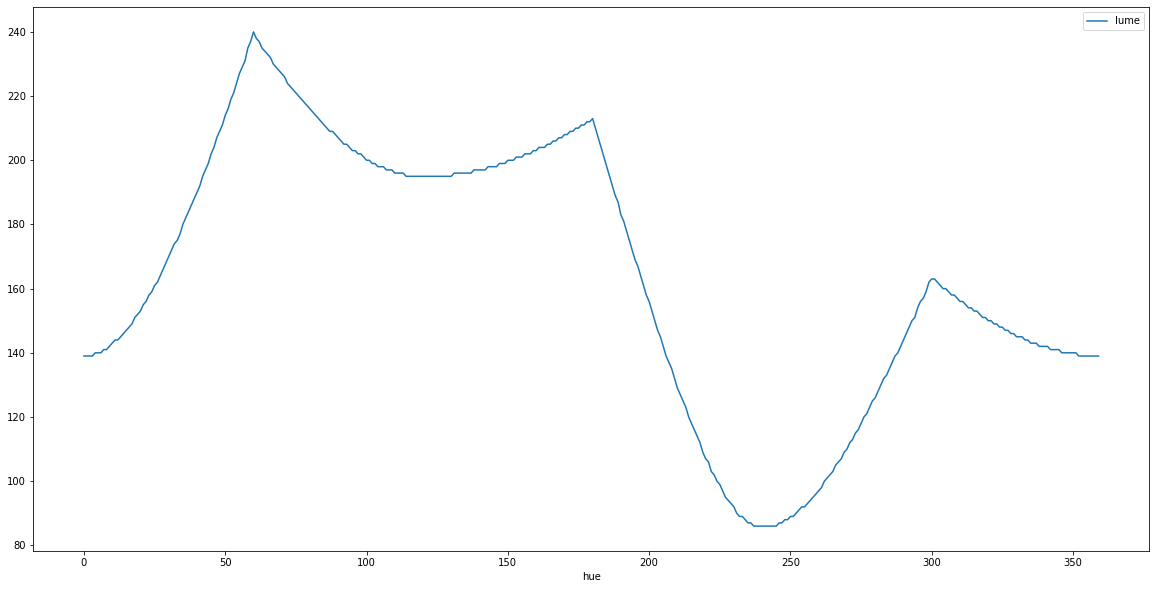

In [116]:
visualize = gen_colors(100, 50)
plt.figure();
# visualize.axhline(y=THRESHOLD, color='r', linestyle='-')
visualize.plot(x='hue', y='lume')

In [85]:
SCALE_LIGHT = [98, 96, 94, 90, 86, 81, 74, 66, 55, 39]
SCALE_DARK = [4, 6, 8, 12, 16, 21, 28, 36, 47, 63]

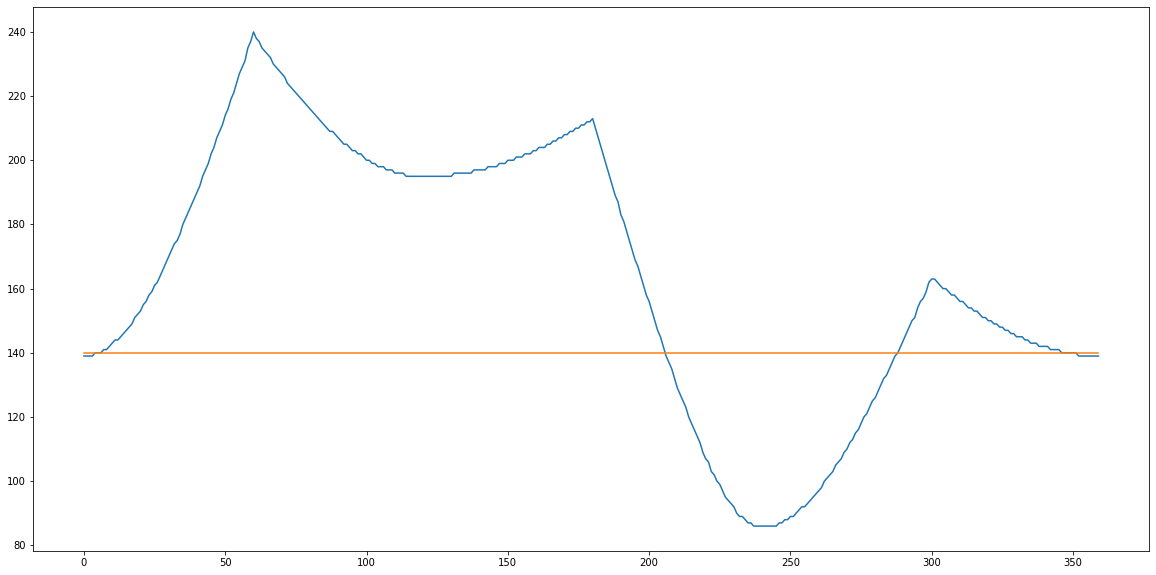

In [120]:
generator = gen_colors(100,50)

x1 = generator['hue']
y1 = generator['lume']

x2 = [i for i in range(360)]
y2 = [THRESHOLD for i in range(0, 360)]

# x3 = generator['hue']
# y3 = [160 for i in range(0, 360)]

plt.plot(x1, y1)
plt.plot(x2, y2)
# line
# plt.plot(x3, y3)

In [97]:
def draw_light(s, l):
    generator = gen_colors(s,l)
    # x,y
    return generator['hue'], generator['lume']

# x,y = draw_light(90, 60)
# print(x,y)

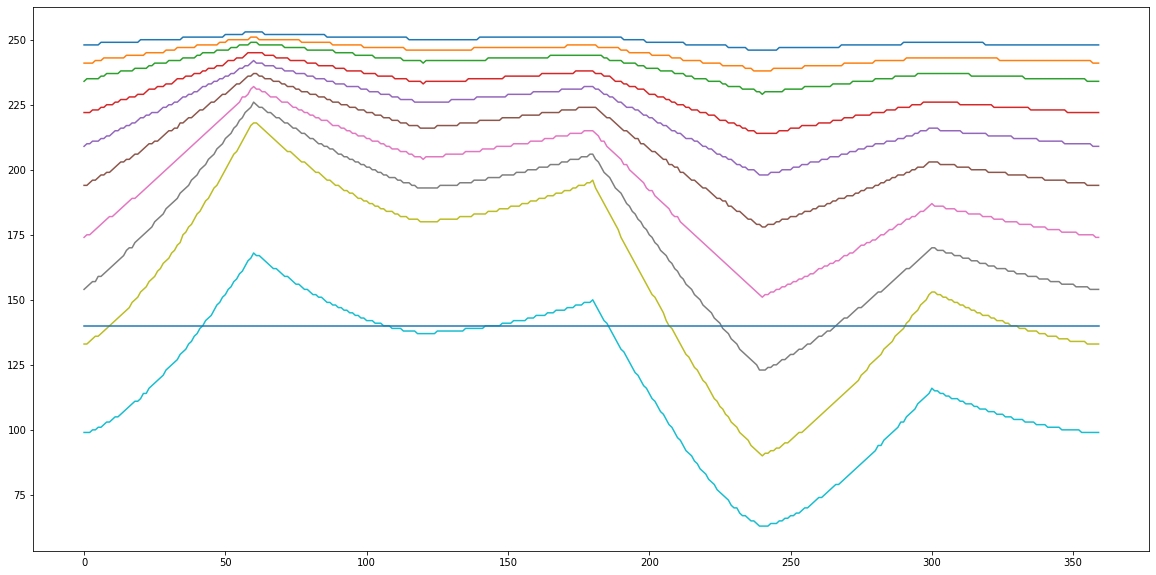

In [118]:
# plt.plot(gen_colors(90,90)['hue'], gen_colors(90,90)['lume'])
# plt.plot(gen_colors(90,70)['hue'], gen_colors(90,70)['lume'])

for step in SCALE_LIGHT:
    x,y = draw_light(80, step)
    plt.plot(x,y)
plt.plot([i for i in range(360)], [THRESHOLD for i in range(0, 360)])


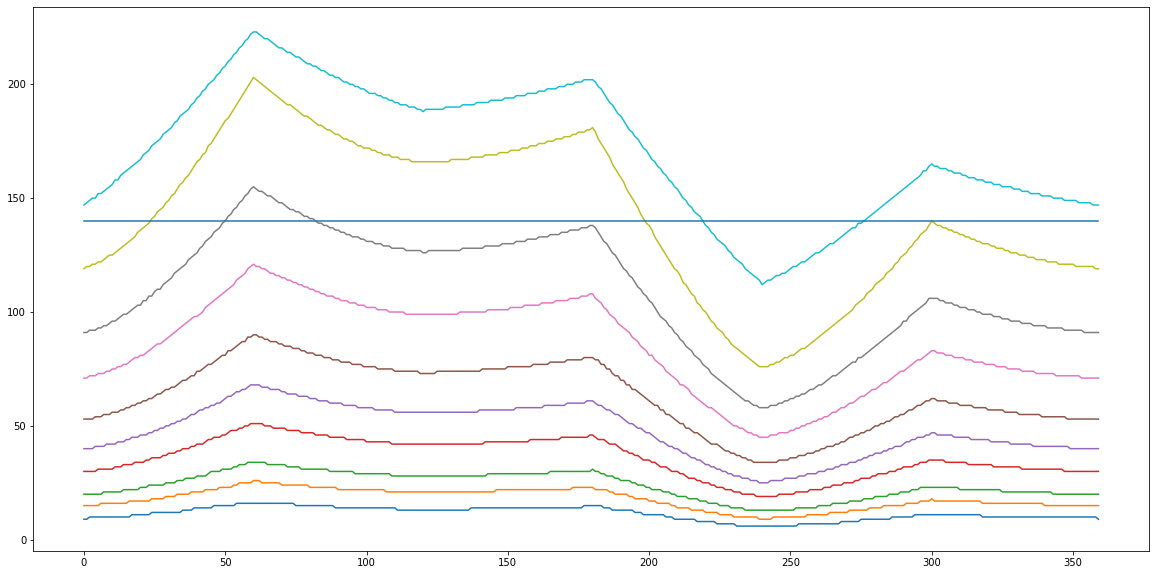

In [119]:
for step in SCALE_DARK:
    x,y = draw_light(80, step)
    plt.plot(x,y)
plt.plot([i for i in range(360)], [THRESHOLD for i in range(0, 360)])
